<span style="color:#04c921; font-size:24px; font-weight:700"> Module 6 - Classification Exercises</span>

We saw why linear regression is not an ideal choice for classification. 
We audited the following classification algorithms logistic regression, LDA and SVM 
which are widely used for data analysis. 

For this exercise, you will apply the classification algorithms you came across in lab 
and practice notebooks on **songs** and **glass** datasets. 
The songs dataset captures details about a song:
year when it is released, title, artist name, loudness pitch, tempo, timbre values etc. 
All these independent values are used to predict if the song has made it to the top 10 of the list. 
Apply a logistic regression model to this dataset.

Read the data from dataset located at `/dsa/data/all_datasets/songs/songs.csv`.

In [3]:
songs_data = read.csv("/dsa/data/all_datasets/songs/songs.csv")
head(songs_data)

year,songtitle,artistname,songID,artistID,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,⋯,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
<int>,<fct>,<fct>,<fct>,<fct>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
2010,This Is the House That Doubt Built,A Day to Remember,SOBGGAB12C5664F054,AROBSHL1187B9AFB01,3,0.853,-4.262,91.525,0.953,⋯,82.475,-52.025,39.116,-35.368,71.642,-126.440,18.658,-44.770,25.989,0
2010,Sticks & Bricks,A Day to Remember,SOPAQHU1315CD47F31,AROBSHL1187B9AFB01,4,1.000,-4.051,140.048,0.921,⋯,106.918,-61.320,35.378,-81.928,74.574,-103.808,121.935,-38.892,22.513,0
2010,All I Want,A Day to Remember,SOOIZOU1376E7C6386,AROBSHL1187B9AFB01,4,1.000,-3.571,160.512,0.489,⋯,80.621,-59.773,45.979,-46.293,59.904,-108.313,33.300,-43.733,25.744,0
2010,It's Complicated,A Day to Remember,SODRYWD1315CD49DBE,AROBSHL1187B9AFB01,4,1.000,-3.815,97.525,0.794,⋯,96.675,-78.660,41.088,-49.194,95.440,-102.676,46.422,-59.439,37.082,0
2010,2nd Sucks,A Day to Remember,SOICMQB1315CD46EE3,AROBSHL1187B9AFB01,4,0.788,-4.707,140.053,0.286,⋯,110.332,-56.450,37.555,-48.588,67.570,-52.796,22.888,-50.414,32.758,0
2010,Better Off This Way,A Day to Remember,SOCEYON1315CD4A23E,AROBSHL1187B9AFB01,4,1.000,-3.807,160.366,0.347,⋯,91.117,-54.378,53.808,-33.183,54.657,-64.478,34.522,-40.922,36.453,0


In [4]:
str(songs_data)
table(songs_data$year)

'data.frame':	7574 obs. of  39 variables:
 $ year                    : int  2010 2010 2010 2010 2010 2010 2010 2010 2010 2010 ...
 $ songtitle               : Factor w/ 7141 levels "̈́ l'or_e des bois",..: 6204 5522 241 3115 48 608 255 4419 2886 6756 ...
 $ artistname              : Factor w/ 1032 levels "50 Cent","98 Degrees",..: 3 3 3 3 3 3 3 3 3 12 ...
 $ songID                  : Factor w/ 7549 levels "SOAACNI1315CD4AC42",..: 595 5439 5252 1716 3431 1020 1831 3964 6904 2473 ...
 $ artistID                : Factor w/ 1047 levels "AR00B1I1187FB433EB",..: 671 671 671 671 671 671 671 671 671 507 ...
 $ timesignature           : int  3 4 4 4 4 4 4 4 4 4 ...
 $ timesignature_confidence: num  0.853 1 1 1 0.788 1 0.968 0.861 0.622 0.938 ...
 $ loudness                : num  -4.26 -4.05 -3.57 -3.81 -4.71 ...
 $ tempo                   : num  91.5 140 160.5 97.5 140.1 ...
 $ tempo_confidence        : num  0.953 0.921 0.489 0.794 0.286 0.347 0.273 0.83 0.018 0.929 ...
 $ key                   


1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001 2002 2003 2004 2005 
 328  196  186  324  198  258  178  329  380  357  363  282  518  434  479  392 
2006 2007 2008 2009 2010 
 479  622  415  483  373 

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 1:</span> Split the songs_data dataframe into train and test sets. 
Use subset function to create songs_traindata and songs_testdata subsets. 
songs_traindata should contain songs with year less than or equal to (<=) 2009 
and songs_testdata should contain songs from year 2010.

In [5]:
# Your code for Activity 1 goes here

#split the data into train and test sets

songs_traindata = subset(songs_data, year <= 2009)

songs_testdata = subset(songs_data, year >= 2010)


<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 2:</span> 
Remove the following independent variables ("year", "songtitle", "artistname", "songID", and "artistID") 
from songs_traindata and songs_testdata. 
Make sure you are assigning this new data back to songs_traindata dataframe. 

In [6]:
# Your code for Activity 2 goes here

songs_traindata = subset(songs_traindata, select = -c(year, songtitle, artistname, songID, artistID))
head(songs_traindata)

songs_testdata = subset(songs_testdata, select = -c(year, songtitle, artistname, songID, artistID))
head(songs_testdata)

,timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,key,key_confidence,energy,pitch,timbre_0_min,⋯,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
374,3,0.732,-6.320,89.614,0.652,1,0.773,0.5985294,0.004,0.000,⋯,70.975,-71.776,58.432,-53.816,88.571,-89.816,38.026,-52.075,52.827,0
375,3,0.906,-9.541,117.742,0.542,0,0.722,0.3633990,0.006,0.739,⋯,112.879,-64.470,58.086,-76.937,74.441,-88.244,42.209,-66.812,40.749,0
376,4,0.987,-4.842,119.018,0.838,6,0.106,0.7601515,0.003,0.000,⋯,90.400,-52.459,40.679,-50.408,58.811,-78.239,35.264,-54.200,46.490,0
377,4,0.822,-5.272,71.479,0.613,4,0.781,0.7550336,0.014,0.000,⋯,93.373,-55.811,78.963,-51.504,70.455,-74.928,30.839,-51.377,27.768,0
378,4,0.983,-6.233,77.492,0.740,8,0.552,0.5236583,0.008,0.000,⋯,100.766,-61.392,50.309,-62.994,96.837,-90.397,60.549,-52.122,48.059,0
379,4,1.000,-6.793,81.859,0.821,9,0.218,0.6546091,0.012,0.000,⋯,89.443,-70.718,50.515,-54.980,80.278,-70.317,54.084,-43.651,43.261,0


timesignature,timesignature_confidence,loudness,tempo,tempo_confidence,key,key_confidence,energy,pitch,timbre_0_min,⋯,timbre_7_max,timbre_8_min,timbre_8_max,timbre_9_min,timbre_9_max,timbre_10_min,timbre_10_max,timbre_11_min,timbre_11_max,Top10
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
3,0.853,-4.262,91.525,0.953,11,0.453,0.9666556,0.024,0.002,⋯,82.475,-52.025,39.116,-35.368,71.642,-126.440,18.658,-44.770,25.989,0
4,1.000,-4.051,140.048,0.921,10,0.469,0.9847095,0.025,0.000,⋯,106.918,-61.320,35.378,-81.928,74.574,-103.808,121.935,-38.892,22.513,0
4,1.000,-3.571,160.512,0.489,2,0.209,0.9899004,0.026,0.003,⋯,80.621,-59.773,45.979,-46.293,59.904,-108.313,33.300,-43.733,25.744,0
4,1.000,-3.815,97.525,0.794,1,0.632,0.9392072,0.013,0.000,⋯,96.675,-78.660,41.088,-49.194,95.440,-102.676,46.422,-59.439,37.082,0
4,0.788,-4.707,140.053,0.286,6,0.483,0.9877376,0.063,0.000,⋯,110.332,-56.450,37.555,-48.588,67.570,-52.796,22.888,-50.414,32.758,0
4,1.000,-3.807,160.366,0.347,4,0.627,0.9799530,0.038,0.000,⋯,91.117,-54.378,53.808,-33.183,54.657,-64.478,34.522,-40.922,36.453,0


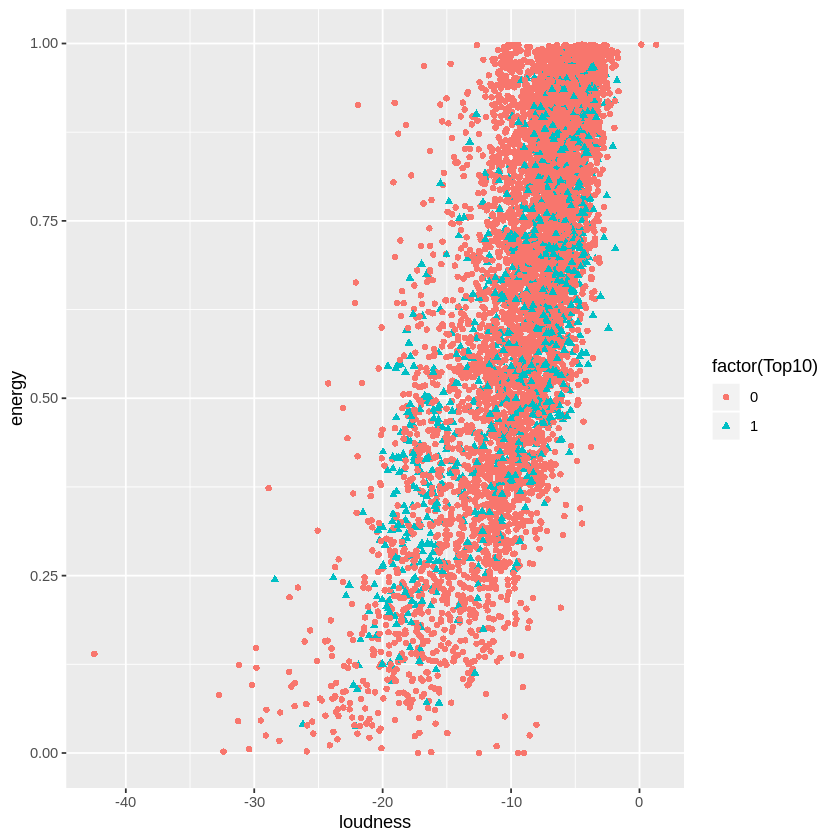

In [7]:
# Use ggplot to plot the the variables loudness and energy of songs_traindata with Top10 
# supplied to color and shape parameters.

library(ggplot2)
songs_plot <- ggplot(songs_traindata, aes(loudness, energy)) + geom_point(aes(colour=factor(Top10),shape=factor(Top10))) 
songs_plot

According to above graph, there is not a clear linear boundary to separate the songs that 
made it to Top10 and those not.

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 3:</span> Fit a logistic regression model to predict Top10 using all the independent variables. 
_Name this model songsLog1_.

In [8]:
# Your code for Activity 3 goes here

songsLog1 = lm(Top10 ~ timesignature + timesignature_confidence + loudness + tempo + tempo_confidence + key + key_confidence + energy + pitch + timbre_0_min + timbre_0_max + timbre_1_min + timbre_1_max + timbre_2_min +timbre_2_max + timbre_3_min + timbre_3_max + timbre_4_min + timbre_4_max + timbre_5_min + timbre_5_max + timbre_6_min + timbre_6_max + timbre_7_min + timbre_7_max + timbre_8_min + timbre_8_max + timbre_9_min + timbre_9_max + timbre_10_min + timbre_10_max + timbre_11_min + timbre_11_max, data=songs_traindata)


In [9]:
summary(songsLog1)


Call:
lm(formula = Top10 ~ timesignature + timesignature_confidence + 
    loudness + tempo + tempo_confidence + key + key_confidence + 
    energy + pitch + timbre_0_min + timbre_0_max + timbre_1_min + 
    timbre_1_max + timbre_2_min + timbre_2_max + timbre_3_min + 
    timbre_3_max + timbre_4_min + timbre_4_max + timbre_5_min + 
    timbre_5_max + timbre_6_min + timbre_6_max + timbre_7_min + 
    timbre_7_max + timbre_8_min + timbre_8_max + timbre_9_min + 
    timbre_9_max + timbre_10_min + timbre_10_max + timbre_11_min + 
    timbre_11_max, data = songs_traindata)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.64275 -0.18535 -0.09007  0.02058  1.07907 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               2.518e+00  1.824e-01  13.811  < 2e-16 ***
timesignature             8.728e-03  7.718e-03   1.131 0.258154    
timesignature_confidence  5.810e-02  1.778e-02   3.267 0.001091 ** 
loudness                  3.900e-

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 4:</span> Make predictions on the test set using songsLog1 model.

In [10]:
# Your code for Activity 4 goes here

# The predict() function can be used to predict the probability that a song from the songs_testdata dataframe
# will be in the Top 10, given values of the predictors. For a default binomial model (i.e., logistic regression
# model), the default predictions are of log-odds (probabilities on logit scale) and type = "response" gives the 
# predicted probabilities. In other words, the type = "response" option tells R to output probabilities of the 
# form P(Y = 1|X).

probs <- predict(songsLog1, type = "response")


<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 5:</span>
What is the accuracy of model 'songsLog1' on the test set, 
using a threshold of 0.5? (Compute the accuracy as a number between 0 and 1.)

**Hint:** Use a 2-way table command between the actual output in test data and the 
predictions you made in activity 4 with a threshold > 0.5

In [11]:
# Your code for Activity 5 goes here

pred = rep(0,length(probs))

pred[probs>0.5] <- 1

conftable <- table(pred, songs_traindata$Top10)
conftable


    
pred    0    1
   0 6113  976
   1   28   84

In [12]:
# Calculate the accuracy of the model here. R can do the math for you.

# Accuracy = (TP + TN) / number of observations in the dataset.

print (paste("accuracy = ",sum(diag(conftable))/length(pred)))


[1] "accuracy =  0.860574920149979"


<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 6:</span>:  Calculate baseline model accuracy.

In [13]:
# Your answer for Activity 6 goes here. Just do the math needed to calculate accuracy.


(6113 + 84)/7201

# 0.860574920149979

[1] 0.8605749

### LDA and SVM

Apply LDA and SVM algorithms on **glass** dataset. 
The dependent variable in the dataset, `Type`, has 6 different classes. 

Load the glass dataset from `/dsa/data/all_datasets/glass/glass.txt`. 
Apply LDA on the dataset to determine the type of glass.

In [1]:
glass_data = read.csv("/dsa/data/all_datasets/glass/glass.txt",header=FALSE,sep=',')
head(glass_data)

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0,0.00,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0,0.00,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0.00,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0.00,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0.00,1
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0,0.26,1


In [2]:
# The data file doesn't have headers. So read the column names into a vector and add column names to the glass dataset.
header = c("Id", "Refractive_Index","Sodium","Magnesium","Aluminium","Silicon","Potassium","Calcium","Barium","Iron","Type")
names(glass_data)=header

In [3]:
head(glass_data)

Id,Refractive_Index,Sodium,Magnesium,Aluminium,Silicon,Potassium,Calcium,Barium,Iron,Type
<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0,0.00,1
2,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0,0.00,1
3,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0,0.00,1
4,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0,0.00,1
5,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0,0.00,1
6,1.51596,12.79,3.61,1.62,72.97,0.64,8.07,0,0.26,1


In [4]:
# Convert Type variable to factor type. 
glass_data$Type=as.factor(glass_data$Type)
str(glass_data)

'data.frame':	214 obs. of  11 variables:
 $ Id              : int  1 2 3 4 5 6 7 8 9 10 ...
 $ Refractive_Index: num  1.52 1.52 1.52 1.52 1.52 ...
 $ Sodium          : num  13.6 13.9 13.5 13.2 13.3 ...
 $ Magnesium       : num  4.49 3.6 3.55 3.69 3.62 3.61 3.6 3.61 3.58 3.6 ...
 $ Aluminium       : num  1.1 1.36 1.54 1.29 1.24 1.62 1.14 1.05 1.37 1.36 ...
 $ Silicon         : num  71.8 72.7 73 72.6 73.1 ...
 $ Potassium       : num  0.06 0.48 0.39 0.57 0.55 0.64 0.58 0.57 0.56 0.57 ...
 $ Calcium         : num  8.75 7.83 7.78 8.22 8.07 8.07 8.17 8.24 8.3 8.4 ...
 $ Barium          : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Iron            : num  0 0 0 0 0 0.26 0 0 0 0.11 ...
 $ Type            : Factor w/ 6 levels "1","2","3","5",..: 1 1 1 1 1 1 1 1 1 1 ...


<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 7:</span> Use ggplot to plot the variables `Refractive_Index` and `Sodium` of glass_data with `Type` variable supplied to color and shape parameters.

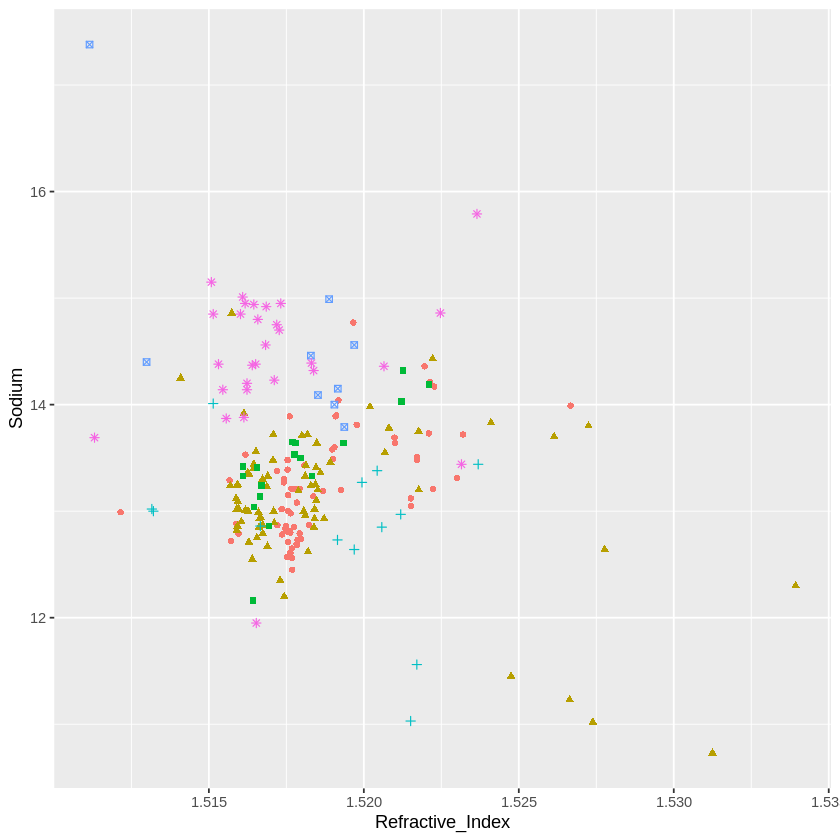

In [5]:
# Your code for Activity 7 goes here.

library(ggplot2)
plot1 <- ggplot(glass_data, aes(Refractive_Index, Sodium)) + geom_point(aes(colour = factor(Type),shape = factor(Type))) + 
    theme(legend.position = "none")
plot1


<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 8:</span> Split the glass_data into train and test subsets. 
`glass_train_data` should have 70% data and glass_test_data should have rest 30% of data. 
Set seed as 123.

In [6]:
# Your code for Activity 8 goes here.

library(devtools)
packageurl <- "https://cran.r-project.org/src/contrib/Archive/caTools/caTools_1.16.tar.gz"
install.packages(packageurl, repos=NULL, type="source")
library(caTools)
set.seed(123) # set.seed() will help us to reproduce the results.
split = sample.split(glass_data, SplitRatio=0.7)

# Train data will have the rest 70% of data
glass_train_data = subset(glass_data, split==TRUE)

# Test data will have the rest 30% of data
glass_test_data  = subset(glass_data, split==FALSE)

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 9:</span> Fit a Linear Discriminant Analysis model on glass_train_data using all independent variables except Id to predict Type variable. Name this model glass_lda_fit.

In [30]:
# Your code for Activity 9 goes here.

library(MASS)

glass_lda_fit <- lda(Type ~ Refractive_Index + Sodium + Magnesium + Aluminium + Silicon + Potassium + Calcium + Barium + Iron, data=glass_train_data)
glass_lda_fit


Call:
lda(Type ~ Refractive_Index + Sodium + Magnesium + Aluminium + 
    Silicon + Potassium + Calcium + Barium + Iron, data = glass_train_data)

Prior probabilities of groups:
         1          2          3          5          6          7 
0.33088235 0.36029412 0.07352941 0.05882353 0.04411765 0.13235294 

Group means:
  Refractive_Index   Sodium Magnesium Aluminium  Silicon Potassium   Calcium
1         1.518510 13.20578 3.5400000  1.187333 72.64644 0.4542222  8.778222
2         1.518618 13.04796 2.9642857  1.386122 72.64184 0.5238776  9.186122
3         1.518053 13.36900 3.5490000  1.214000 72.37900 0.4200000  8.835000
5         1.519489 12.74125 0.9850000  2.057500 72.13375 1.3412500 10.228750
6         1.517650 14.79500 1.3033333  1.423333 73.02667 0.0000000  9.346667
7         1.517374 14.54333 0.5872222  2.148889 72.78333 0.2927778  8.504444
       Barium       Iron
1 0.015333333 0.06622222
2 0.006938776 0.08142857
3 0.000000000 0.05600000
5 0.305000000 0.06375000
6 0.000000

In [8]:
# <lda_model>$count will give the counts for each class in the data
glass_lda_fit$count

1  2  3  5  6  7 
45 49 10  8  6 18

In [9]:
# the singular values (svd) gives the ratio of the between and within-group standard deviations of the linear 
# discriminant variables.
glass_lda_fit$svd

[1] 10.460207  4.058497  2.639895  1.499832  1.278759

In [10]:
# normalized proportions.
prop = glass_lda_fit$svd^2/sum(glass_lda_fit$svd^2)
prop

# Based on values displayed below, 1st LDA can explain more than 79% percent 
# of between-group variance in this dataset.

[1] 0.80016864 0.12045680 0.05096525 0.01645076 0.01195855

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 10:</span> Predict the glass type in glass_test_data using the model glass_lda_fit built above.

In [54]:
# Your code for Activity 10 goes here.

pred <- predict(glass_lda_fit, glass_test_data)


In [37]:
names(pred)

[1] "class"     "posterior" "x"

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 11:</span> Calculate the accuracy of the model using the confusion matrix. 

In [56]:
# Your code for Activity 11 goes here.

# Build a confusion matrix using 2-way table.

confusion_table <- table(pred$class, glass_test_data$Type)
confusion_table


   
     1  2  3  5  6  7
  1 21  8  3  0  0  0
  2  4 16  4  2  0  0
  3  0  0  0  0  0  0
  5  0  2  0  3  0  1
  6  0  1  0  0  3  0
  7  0  0  0  0  0 10

In [57]:
# Accuracy of the model. 

print (paste("accuracy = ",sum(diag(confusion_table))/length(pred)))


[1] "accuracy =  17.6666666666667"


LDA did not do a decent job in classifying `glass` Types. 
Apply SVM on the same data to see if there would be any improvement in the classification accuracy.

<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 12:</span>
Fit a SVM model on glass_train_data using all independent variables except `Id` to predict `Type` variable. 
Name this model glass_svm_fit. 
Make sure to use a **nonlinear kernel**.

In [48]:
# Your code for Activity 12 goes here.

library("e1071")

glass_svm_fit = svm(Type ~ Refractive_Index + Sodium + Magnesium + Aluminium + Silicon + Potassium + Calcium + Barium + Iron, data=glass_train_data, kernel = "polynomial", degree=8, coef0=1)
glass_svm_fit



Call:
svm(formula = Type ~ Refractive_Index + Sodium + Magnesium + Aluminium + 
    Silicon + Potassium + Calcium + Barium + Iron, data = glass_train_data, 
    kernel = "polynomial", degree = 8, coef0 = 1)


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  1 
     degree:  8 
     coef.0:  1 

Number of Support Vectors:  96


<span style="color:#1d80ba; font-size:14px; font-weight:700">Activity 13:</span> Predict the glass type in glass_test_data using the SVM model glass_svm_fit built above. Use the confusion matrix function of caret package to find the accuracy of the model.

In [49]:
# Your code for Activity 13 goes here.

library(caret)

# show the confusion matrix

pred=predict(glass_svm_fit)
conftable1=table(pred, glass_train_data$Type)
conftable1 

Loading required package: lattice


    
pred  1  2  3  5  6  7
   1 42  4  4  0  0  0
   2  3 45  1  0  0  0
   3  0  0  5  0  0  0
   5  0  0  0  8  0  0
   6  0  0  0  0  6  0
   7  0  0  0  0  0 18

# Save your notebook!